### Q 1

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

Assume Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units).

Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units)


In [2]:
cut = pd.read_csv("Cutlets.csv")
cut.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
cut.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [4]:
cut.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [5]:
cut[cut.duplicated()].shape


(0, 2)

In [6]:
cut[cut.duplicated()]


,Unit A,Unit B


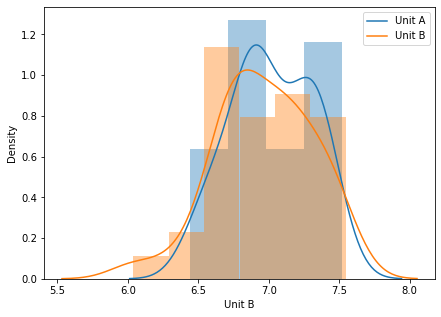

In [7]:
plt.figure(figsize = (7,5))
labels = ['Unit A', 'Unit B']
sns.distplot(cut['Unit A'], kde = True)
sns.distplot(cut['Unit B'],hist = True)
plt.legend(labels)
plt.show()

In [8]:
statistic , p_value = stats.ttest_ind(cut['Unit A'],cut['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


In [9]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


since p-value is greater than α, We fail to reject Null hypothesis.

### Q2

In [10]:
lab = pd.read_csv("LabTAT.csv")
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [11]:
lab.describe()


,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [12]:
lab.isnull().sum()


Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [13]:
lab[lab.duplicated()].shape


(0, 4)

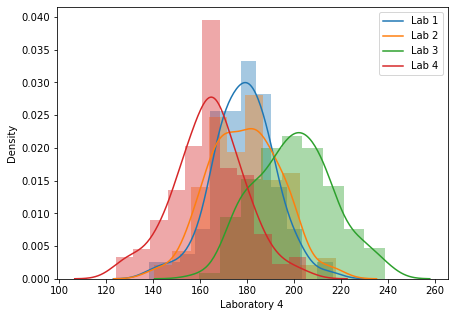

In [14]:
plt.figure(figsize = (7,5))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(lab['Laboratory 1'], kde = True)
sns.distplot(lab['Laboratory 2'],hist = True)
sns.distplot(lab['Laboratory 3'],hist = True)
sns.distplot(lab['Laboratory 4'],hist = True)
plt.legend(labels)
plt.show()

In [15]:
test_statistic , p_value = stats.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


In [16]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null hypothesis')


Significnace=0.050, p=0.000
We reject Null Hypothesis


### Q3

In [17]:
br = pd.read_csv('BuyerRatio.csv')
br

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [18]:
br_table = br.iloc[:,1:6]
br_table

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [19]:
br_table.values


array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [20]:
stat, p, dof, expected = stats.chi2_contingency(br_table)
print('dof=%d' % dof)
print(p)


dof=3
0.6603094907091882


In [21]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')


significance=0.050, p=0.660
Independent


### Q4

In [22]:
cof = pd.read_csv("Costomer+OrderForm.csv")
cof

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [23]:
print(cof['Phillippines'].value_counts(),'\n',cof['Indonesia'].value_counts(),'\n',cof['Malta'].value_counts(),'\n',cof['India'].value_counts())


Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [24]:
# contingency table
Table = [[271,267,269,280],[29,33,31,20]]
print(Table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [34]:

stat, p, df, exp = stats.chi2_contingency(Table)
print("Stats = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Stats =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [30]:

observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])


In [35]:
test_statistic , p_value = stats.chisquare(observed, expected)
print("Test Stats = ",test_statistic,'\n', 'p_value =',p_value)

Test Stats =  3.858960685820355 
 p_value = 0.7958716079649663


In [38]:
alpha = 0.05
print('Significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis')
else:
    print('We fail to reject Null hypothesis')

Significance=0.050, p=0.796
We fail to reject Null hypothesis
